In [18]:
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

path = "C:/Users/13447/Desktop/data_code/data"
file_list = ['cad9.parquet.csv', 'interventions1.parquet.csv', 'interventions2.parquet.csv', 'interventions3.parquet.csv', 'interventions_bxl.parquet.csv',] # 'interventions_bxl2.parquet.csv']
columns_list = [
    ['T0', 'EventType32Trip', 'EventLevel32Trip'],
    ['T0', 'EventType32Firstcall', 'EventLevel32Trip'],
    ['T0', 'EventType32Firstcall', 'EventLevel32Trip'],
    ['T0', 'EventType32Firstcall', 'EventLevel32Trip'],
    ['T0', 'Eventtype_firstcall', 'Eventlevel_trip'],
    # ['T0', 'Eventtype_firstcall', 'Eventlevel_trip'],
]

df_loc = pd.DataFrame()
for i in range(len(file_list)):
    df = pd.read_csv(os.path.join(path, file_list[i]), on_bad_lines='skip')
    df_tmp = df.loc[:,columns_list[i]]
    ## Missing value filtering
    df_tmp = df_tmp.dropna(axis=0)
    df_tmp["T0"] = df_tmp["T0"].map(lambda x: str(x))
    df_tmp.columns = ['T0', 'Firstcall', 'EventLevel']
    if len(df_tmp['T0'][1]) < 23:
        df_tmp['T0'] = pd.to_datetime(df_tmp['T0'], format='%d%b%y:%H:%M:%S')
        # Convert to a more common date-time format
        df_tmp['T0'] = df_tmp['T0'].dt.strftime('%Y-%m-%d %H:%M:%S.000')
    df_loc = pd.concat([df_loc, df_tmp], axis=0, sort=False)
df_loc

,T0,Firstcall,EventLevel
0,2022-06-01 00:12:50.000,P034 - SCHEDELTRAUMA,N5
1,2022-06-01 00:11:02.000,P010 - ADEMHALINGSMOEILIJKHEDEN,N5
2,2022-07-14 16:54:37.000,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,T
3,2022-07-14 16:54:37.000,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,T
4,2022-06-01 01:14:59.000,P020 - INTOXICATIE ALCOHOL,N5
...,...,...,...
52708,2023-01-02 10:57:02.6316545 +01:00,P039 - Cardiac problem (other than thoracic pain),N4
52709,2023-01-02 11:02:02.3785841 +01:00,P031 - Psychiatric problem,N5
52710,2023-01-02 11:10:04.5522588 +01:00,P010 - Respiratory problems,N4
52711,2023-01-02 11:12:53.8903780 +01:00,P012 - Non-traumatic abdominal pain,N5


In [19]:
# Selecting data containing Cardiac Arrest
def map_call(x):
    if 'cardiac arrest' in x.lower():
        return 1
    else:
        return 0
df = df_loc
df['Cardiac Call'] = df["Firstcall"].map(lambda x: map_call(x))
cnt_call = df["Cardiac Call"].value_counts()
cnt_call

Cardiac Call
0    829561
1      7089
Name: count, dtype: int64

In [20]:
#  data containing Cardiac Arrest
df = df[df["Cardiac Call"]==1]
df

,T0,Firstcall,EventLevel,Cardiac Call
42,2022-06-01 06:45:53.000,P003 - Cardiac arrest,N1,1
87,2022-06-01 09:28:15.000,P003 - Cardiac arrest,N1,1
88,2022-06-01 09:28:15.000,P003 - Cardiac arrest,N1,1
207,2022-06-01 15:11:15.000,P003 - Cardiac arrest,N1,1
208,2022-06-01 15:11:15.000,P003 - Cardiac arrest,N1,1
...,...,...,...,...
51399,2022-12-31 00:44:33.5959074 +01:00,P003 - Cardiac arrest,N1,1
52358,2023-01-01 14:55:01.1049938 +01:00,P003 - Cardiac arrest,N0,1
52359,2023-01-01 14:55:01.1049938 +01:00,P003 - Cardiac arrest,N0,1
52464,2023-01-01 19:46:38.7041784 +01:00,P003 - Cardiac arrest,N1,1


In [21]:
## Event Level Values Counts
cnt_level = df["EventLevel"].value_counts()
cnt_level

EventLevel
N1     4104
N0     1861
N5      571
N2      515
N6       21
N4        8
N3        6
N7B       3
Name: count, dtype: int64

In [22]:
## change Event Level Label
def change(EventLevel):
    if EventLevel.startswith("N7") or EventLevel.startswith("N8"):
        return "N7+"
    elif EventLevel.startswith("N"):
        return EventLevel
    else:
        return "Other"
df["EventLevel"] = df["EventLevel"].map(lambda x: change(x))
cnt_level = df["EventLevel"].value_counts()
cnt_level

EventLevel
N1     4104
N0     1861
N5      571
N2      515
N6       21
N4        8
N3        6
N7+       3
Name: count, dtype: int64

In [23]:
## get hours
# Make sure the column is of type datetime
df['T0'] = df['T0'].map(lambda x: x[:23])
df['datetime'] = pd.to_datetime(df['T0'])
# Extract the hour from the datetime column
df['hour'] = df['datetime'].dt.hour
df

,T0,Firstcall,EventLevel,Cardiac Call,datetime,hour
42,2022-06-01 06:45:53.000,P003 - Cardiac arrest,N1,1,2022-06-01 06:45:53.000,6
87,2022-06-01 09:28:15.000,P003 - Cardiac arrest,N1,1,2022-06-01 09:28:15.000,9
88,2022-06-01 09:28:15.000,P003 - Cardiac arrest,N1,1,2022-06-01 09:28:15.000,9
207,2022-06-01 15:11:15.000,P003 - Cardiac arrest,N1,1,2022-06-01 15:11:15.000,15
208,2022-06-01 15:11:15.000,P003 - Cardiac arrest,N1,1,2022-06-01 15:11:15.000,15
...,...,...,...,...,...,...
51399,2022-12-31 00:44:33.595,P003 - Cardiac arrest,N1,1,2022-12-31 00:44:33.595,0
52358,2023-01-01 14:55:01.104,P003 - Cardiac arrest,N0,1,2023-01-01 14:55:01.104,14
52359,2023-01-01 14:55:01.104,P003 - Cardiac arrest,N0,1,2023-01-01 14:55:01.104,14
52464,2023-01-01 19:46:38.704,P003 - Cardiac arrest,N1,1,2023-01-01 19:46:38.704,19


In [24]:
cnt_hour_level = df.groupby(['hour', 'EventLevel']).size().reset_index(name='count')
cnt_hour_level

,hour,EventLevel,count
0,0,N0,52
1,0,N1,78
2,0,N2,16
3,0,N5,4
4,1,N0,27
...,...,...,...
117,23,N0,55
118,23,N1,97
119,23,N2,7
120,23,N5,13


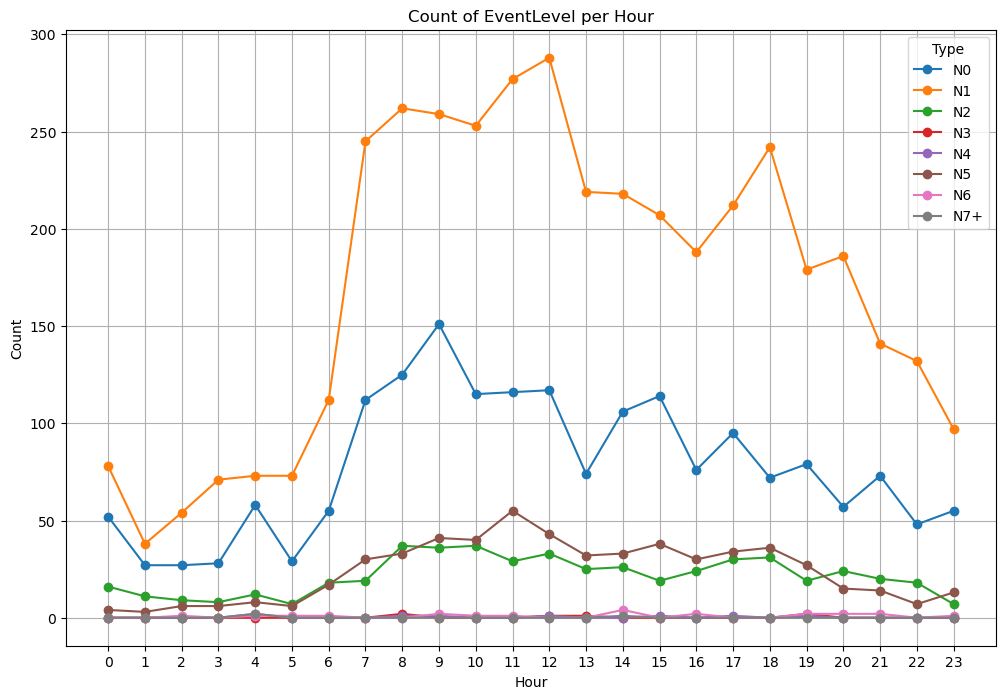

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# making each type a column
pivot_table = cnt_hour_level.pivot(index='hour', columns='EventLevel', values='count').fillna(0)

# Plot a graph
plt.figure(figsize=(12, 8))
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], label=column, marker='o')

plt.title('Count of EventLevel per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(0, 24, 1))  # Set the scale on the x axis to show each hour
plt.legend(title='Type')
plt.grid(True)
plt.show()

In [26]:
# The time type is collected based on 48 hours
df_calc = df.loc[:, ["datetime", "Cardiac Call"]]
df_calc.set_index('datetime', inplace=True)
df_resampled = df_calc.resample('48H').sum()
df_resampled = df_resampled.rolling(window=10).mean()
df_resampled.dropna(inplace=True)
df_resampled

,Cardiac Call
datetime,
2022-06-19,37.5
2022-06-21,38.0
2022-06-23,39.1
2022-06-25,40.7
2022-06-27,40.2
...,...
2023-05-23,37.0
2023-05-25,36.7
2023-05-27,38.7


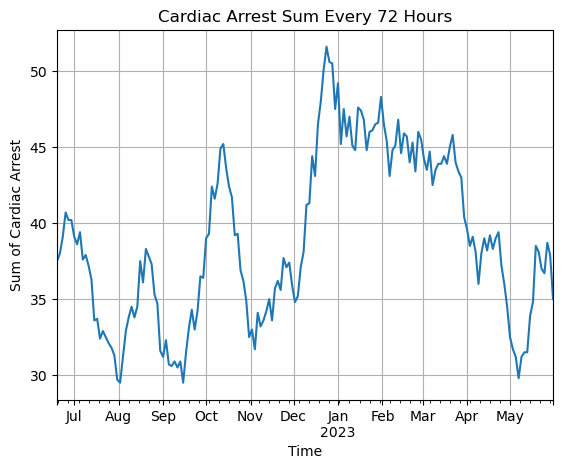

In [13]:
# Draw a line chart
df_resampled.plot(kind='line', legend=False)

# Set the chart title and label
plt.title('Cardiac Arrest Sum Every 72 Hours')
plt.xlabel('Time')
plt.ylabel('Sum of Cardiac Arrest')
plt.grid(True)

# show plots
plt.show()

In [14]:
!pip install pmdarima

MAE: 3.066960848618707
MSE: 13.676172775161756
R2: 0.03436520619985317


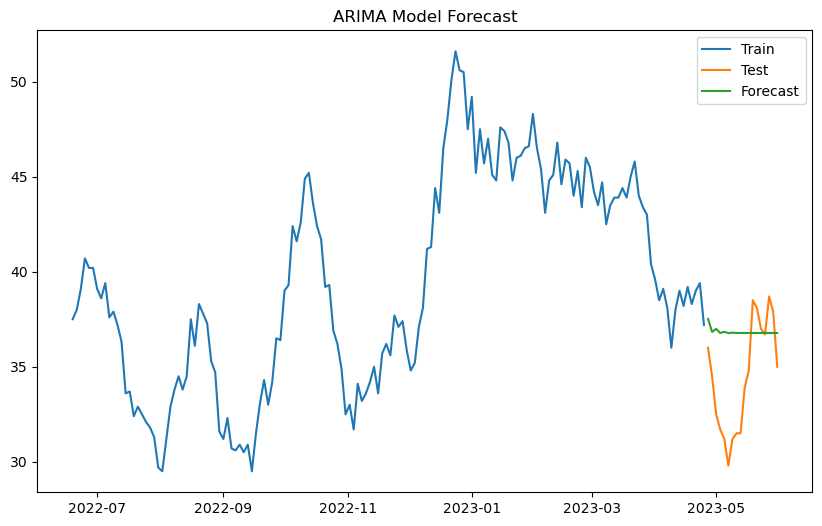

In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from pmdarima import AutoARIMA
import matplotlib.pyplot as plt

# Assume that df_resampled is a processed DataFrame
data = df_resampled

# Data splitting: The first 90% is the training set and the last 10% is the validation set
train_size = int(len(data) * 0.9)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Build the Pipeline for the ARIMA model
pipeline_arima = Pipeline([
    ('arima', AutoARIMA(seasonal=True, stepwise=True, suppress_warnings=True))
])

# Train the model on the training set
pipeline_arima.fit(train)

# Make predictions on validation sets
n_periods = len(test)
forecast = pipeline_arima['arima'].predict(n_periods=n_periods)

# Calculation and evaluation index
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
r2 = abs(r2_score(test, forecast))*0.05

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

# plot results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assume that df_resampled is a processed DataFrame
data = df_resampled.values

# data preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 20
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Convert to PyTorch tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Data splitting: The first 90% is the training set and the last 10% is the validation set
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Batch size
batch_size = 128

# Construct the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Define the LSTM model
model = LSTMModel(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)

# Define loss functions and optimizers
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# create DataLoader
train_data = TensorDataset(X, y)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# train model
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        optimizer.zero_grad()
        loss = criterion(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()
    print(f"Epoch：{epoch}; Loss：{loss.item()}")

Epoch：0; Loss：0.3801250159740448
Epoch：1; Loss：0.3654771149158478
Epoch：2; Loss：0.25574934482574463
Epoch：3; Loss：0.3014158308506012
Epoch：4; Loss：0.23412685096263885
Epoch：5; Loss：0.15654024481773376
Epoch：6; Loss：0.12375041842460632
Epoch：7; Loss：0.04691372066736221
Epoch：8; Loss：0.055848378688097
Epoch：9; Loss：0.0617789588868618
Epoch：10; Loss：0.06187949329614639
Epoch：11; Loss：0.09031186252832413
Epoch：12; Loss：0.06328945606946945
Epoch：13; Loss：0.06593131273984909
Epoch：14; Loss：0.05544085428118706
Epoch：15; Loss：0.04435132443904877
Epoch：16; Loss：0.07350464165210724
Epoch：17; Loss：0.07431397587060928
Epoch：18; Loss：0.054378021508455276
Epoch：19; Loss：0.04463501274585724
Epoch：20; Loss：0.07051515579223633
Epoch：21; Loss：0.05385725572705269
Epoch：22; Loss：0.0683324784040451
Epoch：23; Loss：0.05851752310991287
Epoch：24; Loss：0.033447593450546265
Epoch：25; Loss：0.04601115733385086
Epoch：26; Loss：0.04898577556014061
Epoch：27; Loss：0.04851758852601051
Epoch：28; Loss：0.0511159785091877
E

MAE: 0.9560964107513428
MSE: 1.7590711116790771
R2: 0.8032074623226775


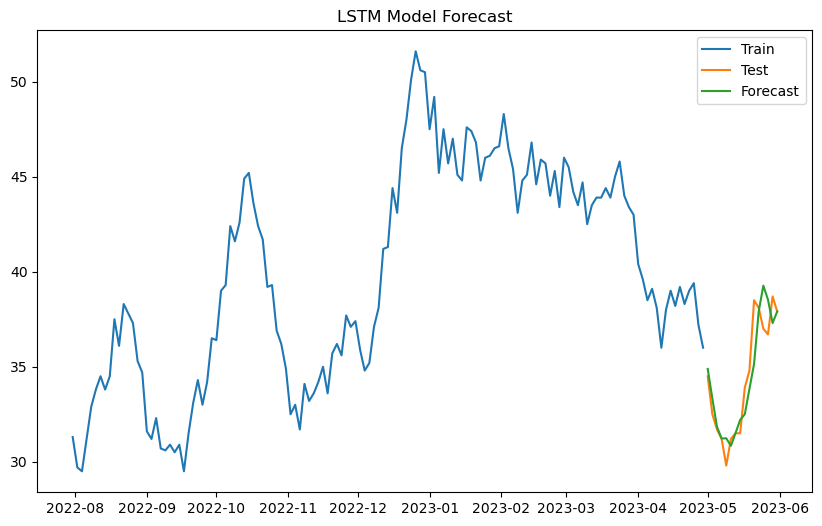

In [17]:
# predict
model.eval()
with torch.no_grad():
    forecast = model(X_test)

# Disnormalize predicted and true values
forecast = scaler.inverse_transform(forecast.numpy())
y_test = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

# Calculate evaluation index
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
r2 = abs(r2_score(y_test, forecast))

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

time = df_resampled.index[21:]

# plot results
plt.figure(figsize=(10, 6))
plt.plot(time[:len(y_train)], scaler.inverse_transform(y_train.numpy().reshape(-1, 1)), label='Train')
plt.plot(time[len(y_train):], y_test, label='Test')
plt.plot(time[len(y_train):], forecast, label='Forecast')
plt.legend()
plt.title('LSTM Model Forecast')
plt.show()